<a href="https://colab.research.google.com/github/rayanqamarsyed/AIlab/blob/main/bfs_dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Paths from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Peshawar -> Quetta -> Karachi
Islamabad -> Peshawar -> Quetta -> Karachi
Islamabad -> Lahore -> Multan -> Karachi


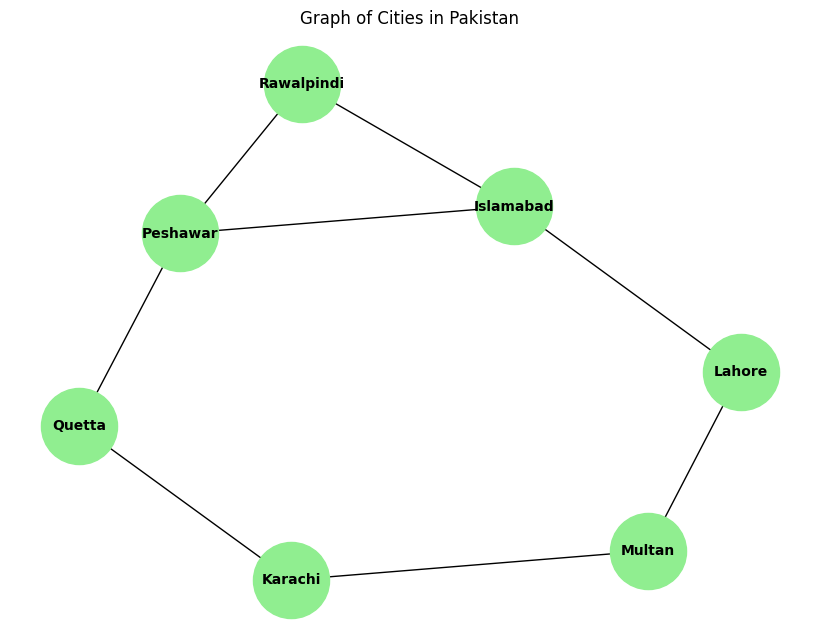

In [ ]:
# Importing necessary libraries for graph visualization
import matplotlib.pyplot as plt
import networkx as nx

# Depth-First Search (DFS) function definition
def dfs(graph, start, goal, path=None):
    # Initialize the path if not provided (first call)
    if path is None:
        path = []

    # Add the current node (start) to the path
    path = path + [start]

    # If the current node is the goal, return the current path as a successful route
    if start == goal:
        return [path]

    # If the current node is not in the graph (invalid node), return an empty list
    if start not in graph:
        return []

    # Initialize a list to store all the valid paths from start to goal
    paths = []

    # Explore neighbors of the current node
    for neighbor in graph[start]:
        # If the neighbor has not been visited yet (not in the current path)
        if neighbor not in path:
            # Recursively perform DFS on the neighbor, looking for new paths
            new_paths = dfs(graph, neighbor, goal, path)
            # Add all valid paths found to the main paths list
            for p in new_paths:
                paths.append(p)

    # Return all valid paths from start to goal
    return paths


# Define the graph of cities in Pakistan as an adjacency list
pakistan_cities_graph = {
    'Islamabad': ['Rawalpindi', 'Peshawar', 'Lahore'],
    'Rawalpindi': ['Islamabad', 'Peshawar'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan'],
    'Multan': ['Lahore', 'Karachi'],
    'Karachi': ['Multan', 'Quetta'],
    'Quetta': ['Peshawar', 'Karachi']
}

# Find all possible paths from 'Islamabad' to 'Karachi' using DFS
paths = dfs(pakistan_cities_graph, 'Islamabad', 'Karachi')

# Print all paths found from 'Islamabad' to 'Karachi'
print("All Paths from Islamabad to Karachi:")
for path in paths:
    print(" -> ".join(path))  # Format the output to show the path as "node1 -> node2 -> node3 -> ..."


# Function to visualize the graph using NetworkX and Matplotlib
def plot_graph(graph):
    # Create a NetworkX graph object
    G = nx.Graph()

    # Add edges (connections) to the graph from the adjacency list
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    # Set up the plot size and layout
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Spring layout positions nodes for visualization

    # Draw the graph with labels, customized node and edge styles
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000,
            font_size=10, font_weight='bold', edge_color='black')

    # Set the title of the plot
    plt.title("Graph of Cities in Pakistan")

    # Display the plot
    plt.show()


# Plot the graph of Pakistan cities
plot_graph(pakistan_cities_graph)
